# BIG MART SALES PREDICTION

# (1) Importing required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor

# (2) Importing the dataset.

In [112]:
train_data=pd.read_csv('train_v9rqX0R (1).csv')
test_data=pd.read_csv('test_AbJTz2l.csv')

A glimpse of the Train Dataset.

In [4]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train_data.shape

(8523, 12)

**So the Train Dataset contains 8523 rows and 12 columns.**

In [6]:
test_data.shape

(5681, 11)

**So the Test Dataset contains 5681 rows and 11 columns.**

# (3) Data Preprocessing

### (3.1) Checking for any duplicate columns.

Checking duplicate columns in Train Dataset.

In [7]:
train_data.T.duplicated().sum()

0

Checking duplicate columns in Test Dataset.

In [8]:
test_data.T.duplicated().sum()

0

**No duplicate columns founded in both Train and Test Dataset.**

### (3.2) Checking for any duplicate rows.

Checking duplicate rows in Train Dataset.

In [9]:
train_data.duplicated().sum()

0

Checking duplicate rows in Test Dataset.

In [10]:
test_data.duplicated().sum()

0

**No duplicate rows founded in both Train and Test Dataset.**

### (3.3) Checking for null values.

Null Values in Train Dataset.

In [11]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Null Values in Test Dataset.

In [12]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**So only Item_Weight and Outlet_Size has null values in both Train and Test Dataset.**

Imputing null values of Item_Weight by Mean Value of the Item_Weight.

In [113]:
fill_values={'Item_Weight':train_data['Item_Weight'].mean()}

In [114]:
train_data.fillna(value=fill_values,inplace=True)
test_data.fillna(value=fill_values,inplace=True)

Imputing null values in Outlet_Size by using Forward Fill Method.

In [115]:
train_data.fillna(method='ffill',inplace=True)
test_data.fillna(method='ffill',inplace=True)

# (4) Visualisation of Dataset

### (4.1) Total Sale per Outlet Type

<BarContainer object of 4 artists>

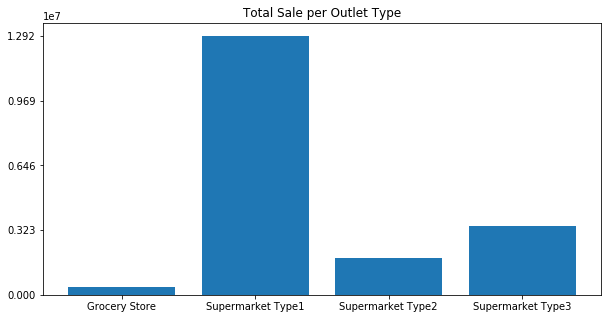

In [76]:
total_sale=train_data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(10,5))
plt.yticks(np.linspace(0,total_sale.values.max(),5))
plt.title("Total Sale per Outlet Type")
plt.bar(total_sale.index,total_sale.values)

### (4.2) No. of items sold per Item Type

<BarContainer object of 16 artists>

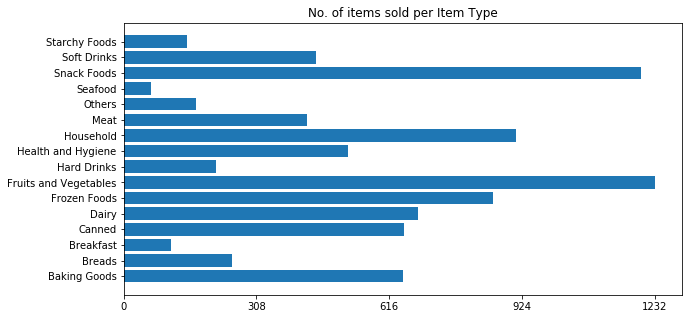

In [17]:
total_sale=train_data.groupby('Item_Type')['Item_Outlet_Sales'].count()
plt.figure(figsize=(10,5))
plt.xticks(np.linspace(0,total_sale.values.max(),5))
plt.title("No. of items sold per Item Type")
plt.barh(total_sale.index,total_sale.values)

### (4.3) Percentage of Total Sales per Outlet Type

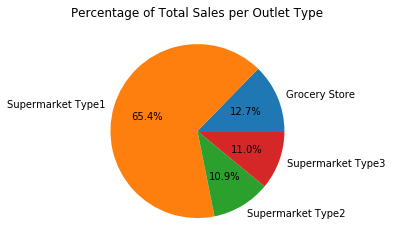

In [18]:
fat_contents=train_data.groupby('Outlet_Type')['Item_Outlet_Sales'].count()
plt.pie(fat_contents.values,labels=fat_contents.index,autopct="%1.1f%%")
plt.title("Percentage of Total Sales per Outlet Type")
plt.show()

### (4.4) Distribution of MRP of various items.

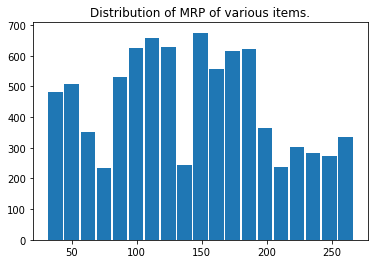

In [20]:
plt.title("Distribution of MRP of various items.")
plt.hist(train_data['Item_MRP'],bins=np.linspace(train_data['Item_MRP'].min(),train_data['Item_MRP'].max(),20),rwidth=0.9)
plt.show()

# (5) Univariate Analysis

Seperating Continuous Variables from the dataset for Univariate Analysis.

In [22]:
cont_data=train_data.loc[:,['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']]

### (5.1) Description of the Dataset

Description containing various Measures of Central Tendency.

In [23]:
cont_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


### (5.2) Distribution of the various features containing numerical values.

<Figure size 3600x720 with 0 Axes>

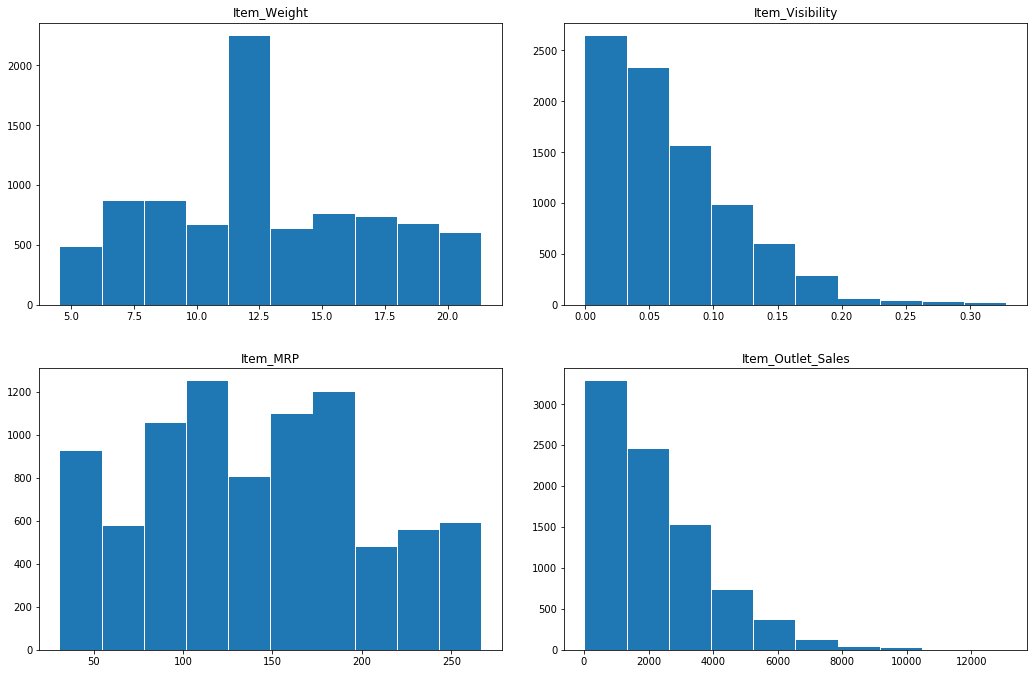

In [24]:
plt.figure(figsize=(50,10))
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
axes[0,0].hist(cont_data['Item_Weight'],rwidth=0.98)
axes[0,1].hist(cont_data['Item_Visibility'],rwidth=0.98)
axes[1,0].hist(cont_data['Item_MRP'],rwidth=0.98)
axes[1,1].hist(cont_data['Item_Outlet_Sales'],rwidth=0.98)
axes[0,0].title.set_text("Item_Weight")
axes[0,1].title.set_text('Item_Visibility')
axes[1,0].title.set_text('Item_MRP')
axes[1,1].title.set_text('Item_Outlet_Sales')
fig.tight_layout(pad=3.0)
plt.show()

### (5.3) The InterQuartile Range of various features.

In [20]:
Q1=cont_data.quantile(0.25)
Q3=cont_data.quantile(0.75)
IQR=Q3-Q1
IQR

Item_Weight             6.690000
Item_Visibility         0.067596
Item_MRP               91.817200
Item_Outlet_Sales    2267.049000
dtype: float64

# (6) Multivariate Analysis

### (6.1) Correlation Matrix of the various features containing numerical values.

In [25]:
cont_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.011550,-0.128625,0.567574,1.000000


### (6.2) HeatMap of the Correlation Matrix.

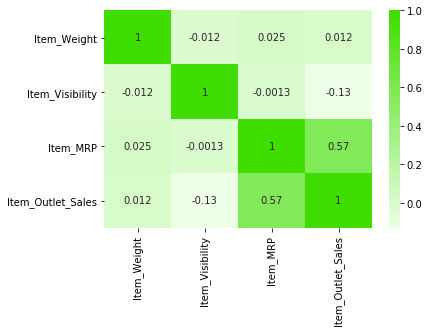

In [26]:
cmap=sns.light_palette("#3fdd01", as_cmap=True)
sns.heatmap(cont_data.corr(),cmap=cmap,annot=True)
plt.show()

### (6.3) Covariance amongst the various features containing numerical values.

In [19]:
cont_data.cov()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,17.860122,-0.002627,6.515364,8.329720e+01
Item_Visibility,-0.002627,0.002662,-0.004225,-1.132561e+01
Item_MRP,6.515364,-0.004225,3878.183909,6.031749e+04
Item_Outlet_Sales,83.297203,-11.325611,60317.485612,2.912141e+06


# (7) Handling Outliers

### (7.1) Box Plot of the feature Item_Weight

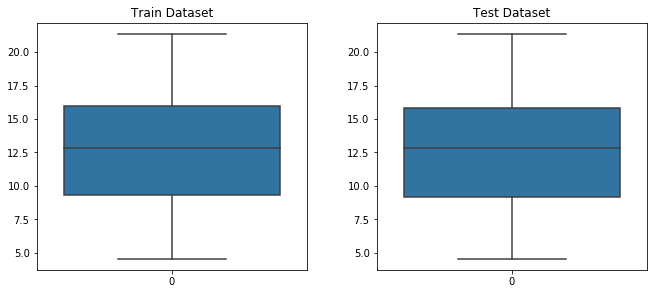

In [77]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot(data=train_data['Item_Weight'], ax=axs[0])
sns.boxplot(data=test_data['Item_Weight'], ax=axs[1])
axs[0].title.set_text('Train Dataset')
axs[1].title.set_text('Test Dataset')
fig.tight_layout(pad=4.0)

**No outliers are present in Item_Weight feature in both Train and Test Dataset.**

### (7.2) Box Plot of the feature Item_MRP

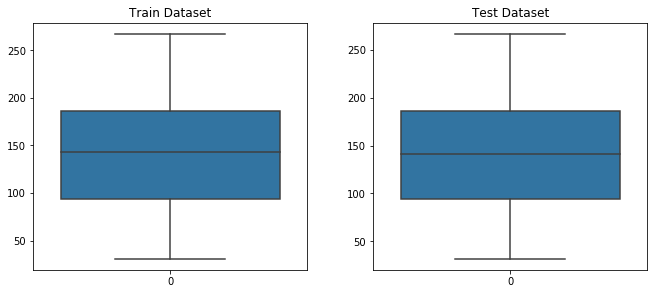

In [78]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot(data=train_data['Item_MRP'], ax=axs[0])
sns.boxplot(data=test_data['Item_MRP'], ax=axs[1])
axs[0].title.set_text('Train Dataset')
axs[1].title.set_text('Test Dataset')
fig.tight_layout(pad=4.0)

**No outliers are present in the feature Item_MRP in both Train and Test Dataset.**

### (7.3) Box Plot of the feature Item_Visibility

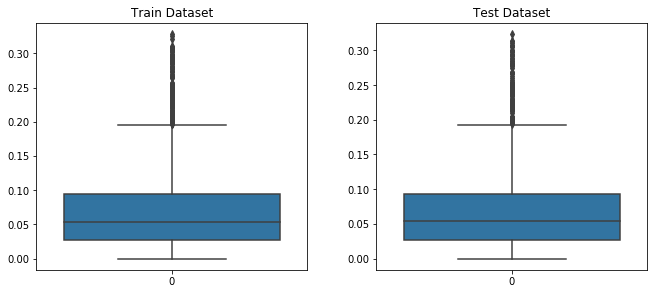

In [117]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot(data=train_data['Item_Visibility'], ax=axs[0])
sns.boxplot(data=test_data['Item_Visibility'], ax=axs[1])
axs[0].title.set_text('Train Dataset')
axs[1].title.set_text('Test Dataset')
fig.tight_layout(pad=4.0)

Counting the total number of Outliers.

In [118]:
Q1=cont_data['Item_Visibility'].quantile(0.25)
Q3=cont_data['Item_Visibility'].quantile(0.75)
IQR=Q3-Q1
ub,lb=Q3+(1.5*IQR),Q1-(1.5*IQR)
outlier_data_train=train_data[(train_data['Item_Visibility']<lb) | (train_data['Item_Visibility']>ub)]
non_outlier_train=train_data[(train_data['Item_Visibility']>lb) & (train_data['Item_Visibility']<ub)]
outlier_data_test=test_data[(test_data['Item_Visibility']<lb) | (test_data['Item_Visibility']>ub)]
non_outlier_test=test_data[(test_data['Item_Visibility']>lb) & (test_data['Item_Visibility']<ub)]
print('Outliers in Train Dataset : ',outlier_data_train.shape[0])
print('Outliers in Test Dataset : ',outlier_data_test.shape[0])

Outliers in Train Dataset :  144
Outliers in Test Dataset :  111


Visualising the outliers in Item_Visibility variable for Train Dataset.

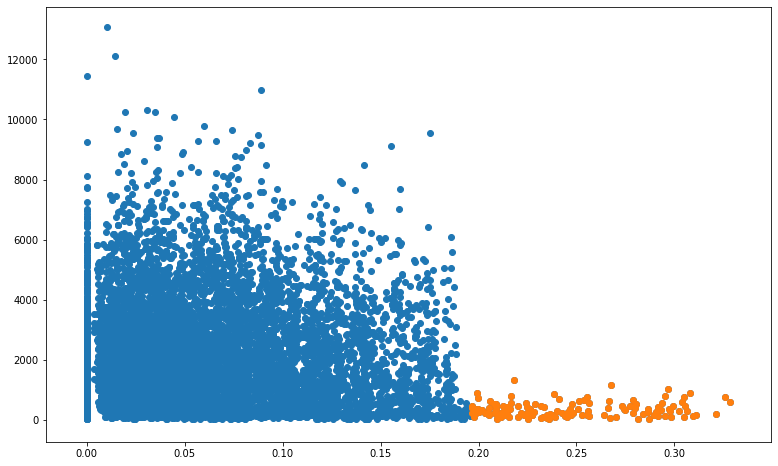

In [119]:
plt.figure(figsize=(13,8))
plt.scatter(train_data['Item_Visibility'],train_data['Item_Outlet_Sales'])
plt.scatter(outlier_data_train['Item_Visibility'],outlier_data_train['Item_Outlet_Sales'])

Capping the outliers in the Item_Visibility feature for both Train and Test Dataset.

In [120]:
min_val=non_outlier_train['Item_Visibility'].min()
max_val=non_outlier_train['Item_Visibility'].max()
train_data['Item_Visibility'].clip(min_val,max_val,inplace=True)
test_data['Item_Visibility'].clip(min_val,max_val,inplace=True)

### (7.4) Box Plot of the Target Variable Item_Outlet_Sales

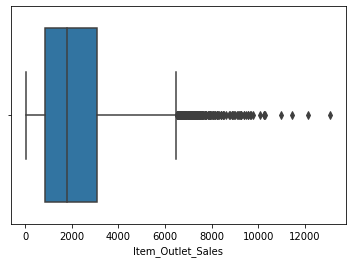

In [121]:
sns.boxplot(train_data['Item_Outlet_Sales'])

In [122]:
Q1=train_data['Item_Outlet_Sales'].quantile(0.25)
Q3=train_data['Item_Outlet_Sales'].quantile(0.75)
IQR=Q3-Q1
ub,lb=Q3+(1.5*IQR),Q1-(1.5*IQR)
outlier_data=train_data[(train_data['Item_Outlet_Sales']<lb) | (train_data['Item_Outlet_Sales']>ub)]
non_outlier=train_data[(train_data['Item_Outlet_Sales']>lb) & (train_data['Item_Outlet_Sales']<ub)]
print('Outliers in Train Dataset : ',outlier_data.shape[0])

Outliers in Train Dataset :  186


Capping the outliers in the target variable Item_Outlet_Sales.

In [123]:
min_val=non_outlier['Item_Outlet_Sales'].min()
max_val=non_outlier['Item_Outlet_Sales'].max()
train_data['Item_Outlet_Sales'].clip(min_val,max_val,inplace=True)

# (8) Feature Engineering

### (8.1) Encoding Item_Fat_Content Variable

Different labels in the variable Item_Fat_Content.

In [124]:
list(train_data.Item_Fat_Content.unique())

['Low Fat', 'Regular', 'low fat', 'LF', 'reg']

Since the lables **Low Fat**, **low fat** and **LF** signifies same meaning hence they could be encode as a similar category.
Similarly the lables **Regular** and **reg** signifies same meaning and hence they could be encode as a similar category.

In [125]:
fat_content_dict={'Low Fat':1, 'Regular':2, 'low fat':1, 'LF':1, 'reg':2}
train_data.Item_Fat_Content=train_data.Item_Fat_Content.map(fat_content_dict)

Applying the same encoding scheme to Test Dataset.

In [126]:
test_data.Item_Fat_Content=test_data.Item_Fat_Content.map(fat_content_dict)

Item_Fat_Content Variable after encoding.

In [128]:
print(train_data.Item_Fat_Content.values)

[1 2 1 ... 1 2 1]


### (8.2) Encoding Item_Type Variable

Different labels in the variable Item_Type.

In [131]:
print(train_data.Item_Type.unique())
print("\nTotal number of labels : ",len(train_data.Item_Type.unique()))

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Total number of labels :  16


Since there are 16 different kinds of labels in the categorical variable Item_Type hence it could not encoded with One Hot Encoder and also being a Nomial Categorical Variable, it could not be Label Encoded.

Hence applying Frequency Encoding on Item_Type Variable.

In [133]:
encoded_type=train_data.groupby('Item_Type').size()/len(train_data)
train_data.loc[:,'Item_Type']=train_data['Item_Type'].map(encoded_type)

Applying the same encoding scheme to Test Dataset.

In [135]:
test_data.loc[:,'Item_Type']=test_data['Item_Type'].map(encoded_type)

Item_Type Variable after encoding.

In [137]:
print(train_data.Item_Type.values)

[0.08001877 0.05221166 0.04986507 ... 0.06101138 0.14079549 0.05221166]


### (8.3) Encoding Outlet_Size Variable

Different labels in the variable Outlet_Size Variable.

In [139]:
print(train_data.Outlet_Size.unique())

['Medium' 'High' 'Small']


Outlet_Size is a Ordinal Categorical Variable.

Hence Encoding Outlet_Size based on its order of size.

In [140]:
encoded_outlet_size={'Small':1,'Medium':2,'High':3}
train_data['Outlet_Size']=train_data['Outlet_Size'].map(encoded_outlet_size)

Applying the same encoding scheme to Test Dataset.

In [142]:
test_data['Outlet_Size']=test_data['Outlet_Size'].map(encoded_outlet_size)

Outlet_Size Variable after encoding.

In [144]:
print(train_data.Outlet_Size.values)

[2 2 2 ... 1 2 1]


### (8.4) Encoding Outlet_Location_Type Variable

Different labels in the variable Outlet_Location_Type Variable.

In [145]:
print(train_data.Outlet_Location_Type.unique())

['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Location_Type is also a Ordinal Categorical Variable.

Hence Encoding Outlet_Location_Type with its corresponding Tier Level.

In [146]:
train_data.Outlet_Location_Type=train_data.Outlet_Location_Type.apply(lambda x :int(x.split(' ')[1]))

Applying the same encoding scheme to Test Dataset.

In [149]:
test_data.Outlet_Location_Type=test_data.Outlet_Location_Type.apply(lambda x :int(x.split(' ')[1]))

Outlet_Location_Type after encoding.

In [150]:
print(train_data.Outlet_Location_Type.values)

[1 2 3 ... 2 2 2]


### (8.5) Encoding Outlet_Type Variable

Different labels in the variable Outlet_Type Variable.

In [151]:
print(train_data.Outlet_Type.unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Outlet_Type is a Nominal Categorical Variable.

Hence using One Hot Encoding on the Outlet_Type Variable.

In [152]:
train_data=pd.get_dummies(train_data,prefix=['Type'],columns=['Outlet_Type'])

Applying the same encoding scheme to Test Dataset.

In [153]:
test_data=pd.get_dummies(test_data,prefix=['Type'],columns=['Outlet_Type'])

### (8.6) Extracting Year Difference Outlet_Establishment_Year Variable

Outlet_Establishment_Year is a categorical variable containing year.

Since the dataset is till the year 2013, hence number of years of establishment can be extracted by subtracting the Year of Establishment with 2013.

And hence creating a new feature for storing number of years since establishment of the store.

In [154]:
train_data['Years_Of_Establishment']=2013-train_data.Outlet_Establishment_Year

Extracting Years of Establishment from Test Dataset.

In [156]:
test_data['Years_Of_Establishment']=2013-test_data.Outlet_Establishment_Year

### (8.7) Extracting features from Item_Identifier Variable

Item_Identifier is a identifier variable which is a unique product ID. 

In [158]:
print('Cardinality : ',len(train_data.Item_Identifier.unique()))

Cardinality :  1559


Since it is a mixed categorical variable and it's not uniquely identifying every record in a dataset (i.e it has repetitions), hence it could be treated as a categorical variable.

Therefore creating two new features (**Item_Identifier_str** and **Item_Identifier_num**) by splitting the string part and the numerical part from the Item_Identifier.

In [159]:
train_data['Item_Identifier_str']=train_data.Item_Identifier.apply(lambda x:x[:3])
train_data['Item_Identifier_num']=train_data.Item_Identifier.apply(lambda x:x[3:])

Creating same new features in Test Dataset.

In [160]:
test_data['Item_Identifier_str']=test_data.Item_Identifier.apply(lambda x:x[:3])
test_data['Item_Identifier_num']=test_data.Item_Identifier.apply(lambda x:x[3:])

Since both **Item_Identifier_str** and **Item_Identifier_num** are categorical variable they had to be encoded.

**Encoding Item_Identifier_str Variable**

In [161]:
print('Cardinality : ',len(train_data.Item_Identifier_str.unique()))

Cardinality :  71


Being a high cardinal variable, hence Frequency Encoding the Item_Identifier_str variable.

In [162]:
encoded_type=train_data.groupby('Item_Identifier_str').size()/len(train_data)
train_data.loc[:,'Item_Identifier_str']=train_data['Item_Identifier_str'].map(encoded_type)

Applying the same encoding scheme to Test Dataset.

In [163]:
test_data.loc[:,'Item_Identifier_str']=test_data['Item_Identifier_str'].map(encoded_type)

**Encoding Item_Identifier_num Variable**

In [164]:
print('Cardinality : ',len(train_data.Item_Identifier_num.unique()))

Cardinality :  60


It is also a high cardinal variable, hence Frequency Encoding the Item_Identifier_num variable.

In [165]:
encoded_type=train_data.groupby('Item_Identifier_num').size()/len(train_data)
train_data.loc[:,'Item_Identifier_num']=train_data['Item_Identifier_num'].map(encoded_type)

Applying the same encoding scheme to Test Dataset.

In [166]:
test_data.loc[:,'Item_Identifier_num']=test_data['Item_Identifier_num'].map(encoded_type)

Dropping Item_Identifier from the dataset from both Train and Test Dataset.

In [167]:
train_data.drop(['Item_Identifier'],axis=1,inplace=True)
test_data.drop(['Item_Identifier'],axis=1,inplace=True)

### (8.8) Extracting features from Outlet_Identifier Variable

Outlet_Identifier is a identifier variable which denotes a unique ID to every outlet.

In [168]:
print('Cardinality of Outlet_Identifier variable : ',len(train_data.Outlet_Identifier.unique()))

Cardinality of Outlet_Identifier variable :  10


Since its a Nominal Categorical Variable so it can't be Label Encoded. Also due to cardinality of 10 it could not be One Hot Encoded as well.

<BarContainer object of 10 artists>

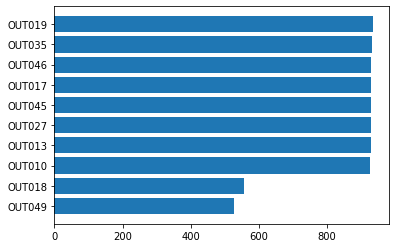

In [170]:
plt.barh(train_data.Outlet_Identifier.unique(),train_data.groupby('Outlet_Identifier').size().sort_values())

Since the frequency of most of the labels are almost same hence it could not be Frequency Encoded. Hence performing Mean Encoding on the Outlet_Identifier Variable.

In [171]:
encoded_type=train_data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()
train_data.loc[:,'Outlet_Identifier']=train_data['Outlet_Identifier'].map(encoded_type)

Applying the same encoding scheme to Test Dataset.

In [172]:
test_data.loc[:,'Outlet_Identifier']=test_data['Outlet_Identifier'].map(encoded_type)

**Dataset after feature engineering.**

In [180]:
train_data.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Type_Grocery Store,Type_Supermarket Type1,Type_Supermarket Type2,Type_Supermarket Type3,Years_Of_Establishment,Item_Identifier_str,Item_Identifier_num
0,9.30,1,0.016047,0.080019,249.8092,2341.408121,1999,2,1,3735.1380,0,1,0,0,14,0.028746,0.017247
1,5.92,2,0.019278,0.052212,48.2692,1994.771238,2009,2,3,443.4228,0,0,1,0,4,0.004341,0.016426
2,17.50,1,0.016760,0.049865,141.6180,2341.408121,1999,2,1,2097.2700,0,1,0,0,14,0.023349,0.017247
3,19.20,2,0.000000,0.144550,182.0950,339.351662,1998,2,3,732.3800,1,0,0,0,15,0.034612,0.017599
4,8.93,1,0.000000,0.106770,53.8614,2285.680684,1987,3,3,994.7052,0,1,0,0,26,0.005749,0.017247


# (9) Feature Selection and Model Selection

Creating a dictionary to store Mean Squared Error of various model for comparision.

In [196]:
model_mse={}

### (9.1) Using RandomForestRegressor as Model for training Train Dataset

Seperating the Input Variables and Target Variable from the Train Dataset.

In [197]:
Y_train_rf=train_data.Item_Outlet_Sales
X_train_rf=train_data.drop(['Item_Outlet_Sales'],axis=1)

Using Forward Feature Selection Method with RandomForestRegressor as an estimator.

In [198]:
mse = make_scorer(mean_squared_error,greater_is_better=False)
random_forest_reg=RandomForestRegressor(n_jobs=-1,random_state=42)
f_selector=SequentialFeatureSelector(random_forest_reg,k_features='best',forward=True,verbose=0,n_jobs=-1,scoring=mse,cv=5)
f_selector.fit(X_train_rf,Y_train_rf)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestRegressor(bootstrap=True,
                                                          ccp_alpha=0.0,
                                                          criterion='mse',
                                                          max_depth=None,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          max_samples=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
   

**Best subset of Features selected after feature selection process.**

In [199]:
f_selector.k_feature_names_

('Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Type_Supermarket Type1',
 'Type_Supermarket Type3',
 'Years_Of_Establishment')

**Plot of Number of Features v/s Performance of Regressor.**

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b3b91360c8>)

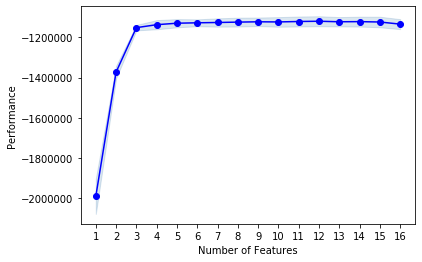

In [200]:
plot_sfs(f_selector.get_metric_dict(),kind='std_dev')

Selecting the best subset of features and removing others from X_Train.

In [201]:
feat_random_forest=list(f_selector.k_feature_names_)
X_train_rf=X_train_rf.loc[:,list(f_selector.k_feature_names_)]

Using GridSearchCV for Hyperparameter Tuning.

In [206]:
grid_params={'bootstrap':[True,False],
            'n_estimators':[50,100,150],
            'max_depth':[2,4,6,8,10],
            'min_samples_split':[40,60,80],
            'max_features':['auto','sqrt']
            }

random_forest_reg=RandomForestRegressor(n_jobs=-1,random_state=42)

grid_search=GridSearchCV(estimator=random_forest_reg,param_grid=grid_params,cv=5,n_jobs=-1,verbose=0)

grid_search.fit(X_train_rf,Y_train_rf)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

Best parameters after Hyperparameter Tuning.

In [207]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_split': 80,
 'n_estimators': 100}

Training the model with the best set of Hyperparameters.

In [210]:
random_forest_reg=RandomForestRegressor(n_jobs=-1,random_state=42,bootstrap=True,max_depth=6,max_features='auto',
                                       min_samples_split=80,n_estimators=100)
mse_rf=np.mean(np.abs(cross_val_score(estimator=random_forest_reg,X=X_train_rf,y=Y_train_rf,cv=5,scoring=mse)))
model_mse['RandomForest']=mse_rf
print('Mean Squared Error : ',mse_rf)

Mean Squared Error :  1025895.3761690045


### (9.2) Using AdaBoostRegressor as Model for training Train Dataset

Seperating the Input Variables and Target Variable from the Train Dataset.

In [211]:
Y_train_ada=train_data.Item_Outlet_Sales
X_train_ada=train_data.drop(['Item_Outlet_Sales'],axis=1)

Using Forward Feature Selection Method with AdaBoostRegressor as an estimator.

In [216]:
mse = make_scorer(mean_squared_error,greater_is_better=False)
decision_tree=DecisionTreeRegressor(criterion='mse',max_depth=6,max_features='auto',min_samples_split=5,splitter='random',random_state=42)
adaboost_reg=AdaBoostRegressor(base_estimator=decision_tree,random_state=42)
f_selector=SequentialFeatureSelector(adaboost_reg,k_features='best',forward=True,verbose=0,n_jobs=-1,scoring=mse,cv=5)
f_selector.fit(X_train_ada,Y_train_ada)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                           criterion='mse',
                                                                                           max_depth=6,
                                                                                           max_features='auto',
                                                                                           max_leaf_nodes=None,
                                                                                           min_impurity_decrease=0.0,
                                                                                           min_impurity_split=None,
                                                                                           min_samples_leaf=1,
                                                           

**Best subset of Features selected after feature selection process.**

In [217]:
f_selector.k_feature_names_

('Item_MRP', 'Outlet_Identifier', 'Type_Grocery Store')

**Plot of Number of Features v/s Performance of Regressor.**

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b3b81e3808>)

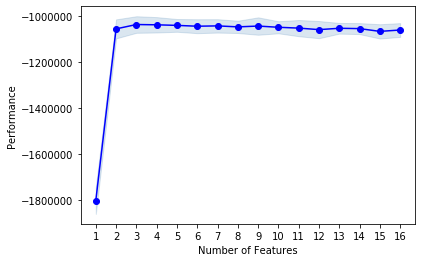

In [218]:
plot_sfs(f_selector.get_metric_dict(),kind='std_dev')

Selecting the best subset of features and removing others from X_Train.

In [219]:
feat_adaboost=list(f_selector.k_feature_names_)
X_train_ada=X_train_ada.loc[:,list(f_selector.k_feature_names_)]

Using GridSearchCV for Hyperparameter Tuning.

In [220]:
grid_params={'n_estimators':[50,100,150],
            'learning_rate':[0.05,0.5, 1.0, 1.5],
            'loss':['linear','square','exponential']
            }

decision_tree=DecisionTreeRegressor(criterion='mse',max_depth=6,max_features='auto',min_samples_split=5,splitter='random',random_state=42)
adaboost_reg=AdaBoostRegressor(base_estimator=decision_tree,random_state=42)

grid_search=GridSearchCV(estimator=adaboost_reg,param_grid=grid_params,cv=5,n_jobs=-1,verbose=0)

grid_search.fit(X_train_ada,Y_train_ada)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                              criterion='mse',
                                                                              max_depth=6,
                                                                              max_features='auto',
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=5,
                                                                              min_

Best parameters after Hyperparameter Tuning.

In [221]:
grid_search.best_params_

{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 50}

Training the model with the best set of Hyperparameters.

In [222]:
decision_tree=DecisionTreeRegressor(criterion='mse',max_depth=6,max_features='auto',min_samples_split=5,splitter='random',random_state=42)
adaboost_reg=AdaBoostRegressor(base_estimator=decision_tree,random_state=42,learning_rate=0.05,loss='exponential',
                              n_estimators=50)
mse_ada=np.mean(np.abs(cross_val_score(estimator=adaboost_reg,X=X_train_ada,y=Y_train_ada,cv=5,scoring=mse)))
model_mse['AdaBoost']=mse_ada
print('Mean Squared Error : ',mse_ada)

Mean Squared Error :  1024405.2276285024


### (9.3) Using GradientBoostingRegressor as Model for training Train Dataset

Seperating the Input Variables and Target Variable from the Train Dataset.

In [223]:
Y_train_gb=train_data.Item_Outlet_Sales
X_train_gb=train_data.drop(['Item_Outlet_Sales'],axis=1)

Using Forward Feature Selection Method with GradientBoostingRegressor as an estimator.

In [224]:
mse = make_scorer(mean_squared_error,greater_is_better=False)
gradient_boost_reg=GradientBoostingRegressor(criterion='mse',verbose=0,random_state=42)
f_selector=SequentialFeatureSelector(gradient_boost_reg,k_features='best',forward=True,verbose=0,n_jobs=-1,scoring=mse,cv=5)
f_selector.fit(X_train_gb,Y_train_gb)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=GradientBoostingRegressor(alpha=0.9,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              init=None,
                                                              learning_rate=0.1,
                                                              loss='ls',
                                                              max_depth=3,
                                                              max_features=None,
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_l

**Best subset of Features selected after feature selection process.**

In [225]:
f_selector.k_feature_names_

('Item_Visibility',
 'Item_MRP',
 'Outlet_Identifier',
 'Type_Grocery Store',
 'Type_Supermarket Type1',
 'Type_Supermarket Type3',
 'Item_Identifier_num')

**Plot of Number of Features v/s Performance of Regressor.**

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b3b906abc8>)

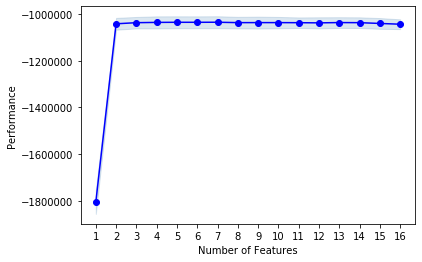

In [226]:
plot_sfs(f_selector.get_metric_dict(),kind='std_dev')

Selecting the best subset of features and removing others from X_Train.

In [227]:
feat_gradientboost=list(f_selector.k_feature_names_)
X_train_gb=X_train_gb.loc[:,list(f_selector.k_feature_names_)]

Using GridSearchCV for Hyperparameter Tuning.

In [228]:
grid_params={'learning_rate':[0.05,0.075,0.1,0.2],
            'n_estimators':[50,100,150],
            'max_depth':[2,4,6,8,10],
            'min_samples_leaf':[10,20,30],
            'min_samples_split':[40,60,80],
            'subsample':[0.5,0.7,0.8],
            'max_features':['auto','sqrt']
            }

gradient_boost_reg=GradientBoostingRegressor(criterion='mse',verbose=0,random_state=42)

grid_search=GridSearchCV(estimator=gradient_boost_reg,param_grid=grid_params,cv=5,n_jobs=-1,verbose=0)

grid_search.fit(X_train_gb,Y_train_gb)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='mse', init=None,
                                                 learning_rate=0.1, loss='ls',
                                                 max_depth=3, max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=...
                                                 verbose=0, warm_start=False)

Best parameters after Hyperparameter Tuning.

In [229]:
grid_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 20,
 'min_samples_split': 80,
 'n_estimators': 150,
 'subsample': 0.5}

Training the model with the best set of Hyperparameters.

In [335]:
gradient_boost_reg=GradientBoostingRegressor(criterion='mse',verbose=0,random_state=42,learning_rate=0.05,max_depth=2,
                                            max_features='auto',min_samples_leaf=20,min_samples_split=80,
                                            n_estimators=150,subsample=0.5)
mse_gb=np.mean(np.abs(cross_val_score(estimator=gradient_boost_reg,X=X_train_gb,y=Y_train_gb,cv=5,scoring=mse)))
model_mse['GradientBoost']=mse_gb
print('Mean Squared Error : ',mse_gb)

Mean Squared Error :  1023915.472930542


# (10) Selecting the Best Model

**Comparing the Mean Squared Errors (MSE) of the different models.**

In [283]:
for model in model_mse.keys():
    print(model,':',model_mse[model])

RandomForest : 1025895.3761690045
AdaBoost : 1024405.2276285024
GradientBoost : 1023915.472930542


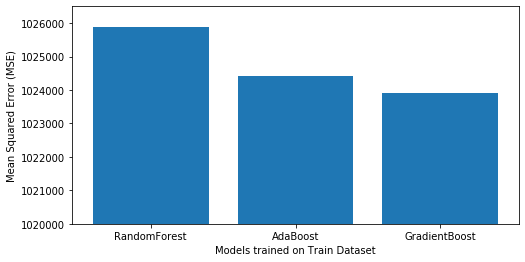

In [314]:
plt.figure(figsize=(8,4))
plt.bar(list(model_mse.keys()),model_mse.values())
plt.ylim(1020000,1026500)
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Models trained on Train Dataset')
plt.show()

**Comparing the Root Mean Squared Errors (RMSE) of the different models.**

In [298]:
for model in model_mse.keys():
    print(model,':',np.sqrt(model_mse[model]))

RandomForest : 1012.864934810661
AdaBoost : 1012.1290568047646
GradientBoost : 1011.8870850695457


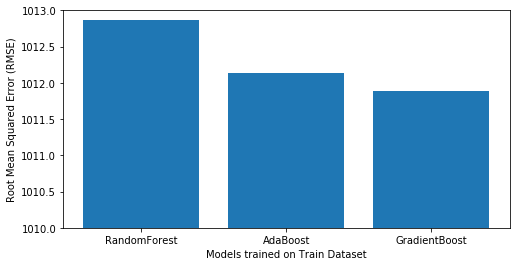

In [312]:
plt.figure(figsize=(8,4))
plt.bar(list(model_mse.keys()),np.sqrt(list(model_mse.values())))
plt.ylim(1010,1013)
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Models trained on Train Dataset')
plt.show()

**Since GradientBoostingRegressor shows the least MSE and RMSE hence it will be used to predict the Test Dataset Values.**

Finding Optimal number of Splits for Cross Validation for GradientBoostingRegressor

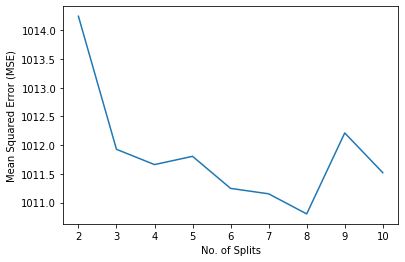

In [323]:
rmse={}
for i in range(2,11):
    temp=cross_val_score(estimator=gradient_boost_reg,X=X_train_gb,y=Y_train_gb,cv=i,scoring=mse)
    rmse[i]=np.mean(np.sqrt(np.abs(temp)))
plt.plot(list(rmse.keys()),list(rmse.values()))
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('No. of Splits')
plt.show()

So Optimal number of Splits for Cross Validation should be **8**.

**Evaluation Metrics of the trained GradientBoostingRegressor Model using Optimal number of Splits**

In [336]:
mae=make_scorer(mean_absolute_error,greater_is_better=False)
print('Root Mean Squared Error (RMSE) : ',np.mean(np.sqrt(np.abs(cross_val_score(estimator=gradient_boost_reg,X=X_train_gb,
                                                                    y=Y_train_gb,cv=8,scoring=mse)))))
print('Mean Squared Error (MSE) : ',np.mean(np.abs(cross_val_score(estimator=gradient_boost_reg,X=X_train_gb,
                                                                    y=Y_train_gb,cv=8,scoring=mse))))
print('Mean Absolute Error (MAE) : ',np.mean(np.abs(cross_val_score(estimator=gradient_boost_reg,X=X_train_gb,
                                                                    y=Y_train_gb,cv=8,scoring=mae))))
print('R2 Score : ',np.mean(np.abs(cross_val_score(estimator=gradient_boost_reg,X=X_train_gb,y=Y_train_gb,cv=8,scoring='r2'))))

Root Mean Squared Error (RMSE) :  1010.8017587516964
Mean Squared Error (MSE) :  1022640.5807811322
Mean Absolute Error (MAE) :  734.9043592727817
R2 Score :  0.6114621885710974


# (11) Predicting Item_Outlet_Sales for Test Dataset

Using GradientBoostingRegressor for predicting Item_Outlet_Sales of the Test Dataset.

In [344]:
regressor=GradientBoostingRegressor(criterion='mse',verbose=0,random_state=42,learning_rate=0.05,max_depth=2,
                                    max_features='auto',min_samples_leaf=20,min_samples_split=80,
                                    n_estimators=150,subsample=0.5)
regressor.fit(X_train_gb,Y_train_gb)
test_data=test_data.loc[:,feat_gradientboost]
final_df=pd.read_csv('test_AbJTz2l.csv')
final_df['Item_Outlet_Sales']=regressor.predict(test_data)

In [345]:
final_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1736.754182
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1409.104262
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,740.763477
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2487.108956
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5238.294373


-------------------------------------------------------------------------------------------------------------------------------